In [15]:
import numpy as np
import pandas_profiling as pp
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [16]:
dataset = pd.read_csv(r"KAG_energydata_complete.csv")

In [4]:
dataset

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
5      2016-01-11 17:50:00          50      40  19.890000  46.026667   
6      2016-01-11 18:00:00          60      50  19.890000  45.766667   
7      2016-01-11 18:10:00          60      50  19.856667  45.560000   
8      2016-01-11 18:20:00          60      40  19.790000  45.597500   
9      2016-01-11 18:30:00          70      40  19.856667  46.090000   
10     2016-01-11 18:40:00         230      70  19.926667  45.863333   
11     2016-01-11 18:50:00         580      60  20.066667  46.396667   
12     2016-01-11 19:00:00         430      50  20.133333  48.000000   
13     2016-01-11 19:10:00         250      40  20.260000  52.726667   
14     2016-01-11 19:20:00         100      10  20.426667  55.893333   
15     2016-01-11 19:30:00         100      10  20.566667  53.893333   
16     2016-01-11 19:40:00          90      10  20.730000  52.660000   
17     2016-01-11 19:50:00          70      30  20.856667  53.660000   
18     2016-01-11 20:00:00          80      30  20.890000  51.193333   
19     2016-01-11 20:10:00         140      40  20.890000  49.800000   
20     2016-01-11 20:20:00         120      20  20.890000  48.433333   
21     2016-01-11 20:30:00         190      40  20.963333  47.633333   
22     2016-01-11 20:40:00         110      40  21.033333  47.063333   
23     2016-01-11 20:50:00         110      40  21.100000  46.596667   
24     2016-01-11 21:00:00         110      30  21.133333  46.060000   
25     2016-01-11 21:10:00         110      20  21.200000  45.800000   
26     2016-01-11 21:20:00         100      30  21.290000  45.900000   
27     2016-01-11 21:30:00         100      20  21.356667  45.826667   
28     2016-01-11 21:40:00         100      20  21.390000  45.690000   
29     2016-01-11 21:50:00         100      20  21.500000  45.333333   
...                    ...         ...     ...        ...        ...   
19705  2016-05-27 13:10:00         280       0  25.033333  48.363333   
19706  2016-05-27 13:20:00         240       0  25.166667  48.156667   
19707  2016-05-27 13:30:00         250       0  25.323333  47.930000   
19708  2016-05-27 13:40:00         220       0  25.390000  47.656667   
19709  2016-05-27 13:50:00         230       0  25.500000  47.133333   
19710  2016-05-27 14:00:00         190      10  25.500000  47.060000   
19711  2016-05-27 14:10:00         160       0  25.600000  46.990000   
19712  2016-05-27 14:20:00          80       0  25.600000  46.730000   
19713  2016-05-27 14:30:00          60       0  25.566667  46.633333   
19714  2016-05-27 14:40:00          60       0  25.500000  46.360000   
19715  2016-05-27 14:50:00          60       0  25.500000  46.060000   
19716  2016-05-27 15:00:00          60       0  25.500000  45.933333   
19717  2016-05-27 15:10:00          70       0  25.500000  45.760000   
19718  2016-05-27 15:20:00          80       0  25.500000  45.626667   
19719  2016-05-27 15:30:00          80       0  25.500000  45.590000   
19720  2016-05-27 15:40:00          70       0  25.500000  45.522500   
19721  2016-05-27 15:50:00         100       0  25.500000  45.633333   
19722  2016-05-27 16:00:00         100       0  25.500000  45.730000   
19723  2016-05-27 16:10:00          90       0  25.500000  45.790000   
19724  2016-05-27 16:20:00         100       0  25.500000  45.933333   
19725  2016-05-27 16:30:00         220       0  25.426667  46.060000   
19726  2016-05-27 16:40:00         180       0  25.500000  46.530000   
19727  2016-05-27 16:50:00         120       0  25.500000  47.456667   
19728  2016-05-27 17:00:00         110       0  25.600000  47.

In [5]:
pp.ProfileReport(dataset)

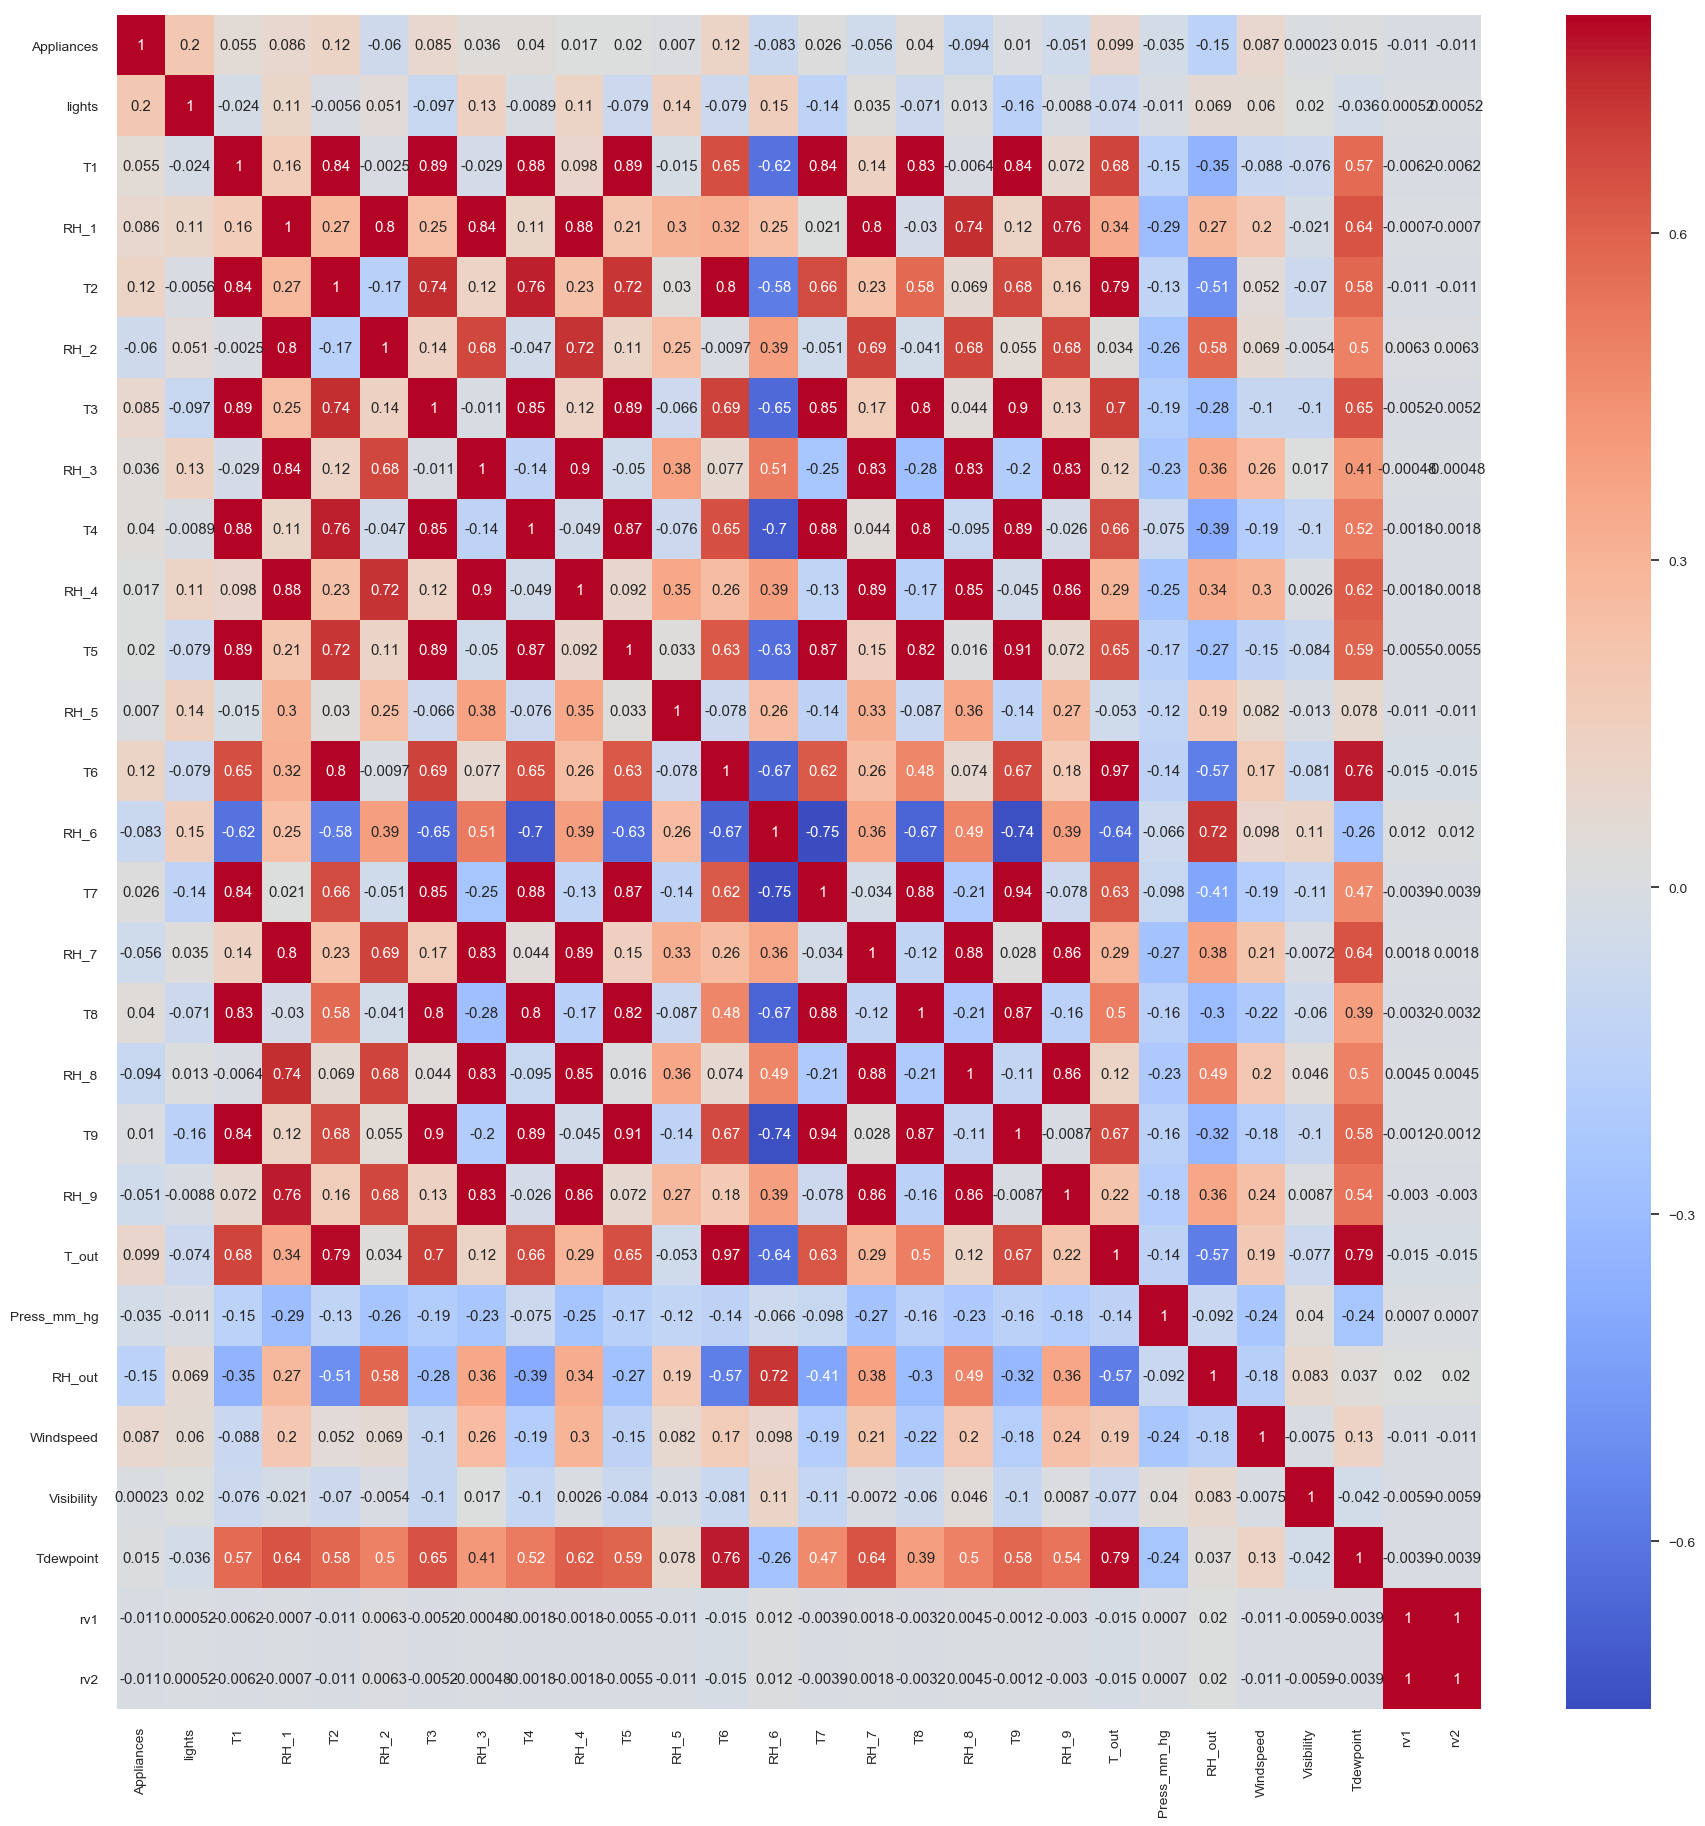

In [17]:
koef_matrix = dataset.corr()
sns.set(font_scale=0.9)
f, ax=plt.subplots(figsize=(22,22))
korelasi = sns.heatmap(koef_matrix, annot= True,vmax=.8, cmap='coolwarm')

In [20]:
#separate target from attribute
x = dataset.drop(['Appliances','lights','T6','T7','date'],axis=1)
#target diambil untuk appliances saja karena light 73% zeros
y = dataset['Appliances']

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(x)
x

T1       RH_1         T2       RH_2         T3       RH_3  \
0      19.890000  47.596667  19.200000  44.790000  19.790000  44.730000   
1      19.890000  46.693333  19.200000  44.722500  19.790000  44.790000   
2      19.890000  46.300000  19.200000  44.626667  19.790000  44.933333   
3      19.890000  46.066667  19.200000  44.590000  19.790000  45.000000   
4      19.890000  46.333333  19.200000  44.530000  19.790000  45.000000   
5      19.890000  46.026667  19.200000  44.500000  19.790000  44.933333   
6      19.890000  45.766667  19.200000  44.500000  19.790000  44.900000   
7      19.856667  45.560000  19.200000  44.500000  19.730000  44.900000   
8      19.790000  45.597500  19.200000  44.433333  19.730000  44.790000   
9      19.856667  46.090000  19.230000  44.400000  19.790000  44.863333   
10     19.926667  45.863333  19.356667  44.400000  19.790000  44.900000   
11     20.066667  46.396667  19.426667  44.400000  19.790000  44.826667   
12     20.133333  48.000000  19.566667  44.400000  19.890000  44.900000   
13     20.260000  52.726667  19.730000  45.100000  19.890000  45.493333   
14     20.426667  55.893333  19.856667  45.833333  20.033333  47.526667   
15     20.566667  53.893333  20.033333  46.756667  20.100000  48.466667   
16     20.730000  52.660000  20.166667  47.223333  20.200000  48.530000   
17     20.856667  53.660000  20.200000  47.056667  20.200000  48.447500   
18     20.890000  51.193333  20.200000  46.330000  20.200000  48.193333   
19     20.890000  49.800000  20.200000  46.026667  20.166667  47.633333   
20     20.890000  48.433333  20.200000  45.722500  20.166667  47.300000   
21     20.963333  47.633333  20.260000  45.530000  20.200000  47.026667   
22     21.033333  47.063333  20.290000  45.223333  20.260000  46.826667   
23     21.100000  46.596667  20.356667  44.963333  20.290000  46.633333   
24     21.133333  46.060000  20.426667  44.760000  20.290000  46.433333   
25     21.200000  45.800000  20.500000  44.760000  20.390000  46.223333   
26     21.290000  45.900000  20.533333  45.090000  20.390000  46.090000   
27     21.356667  45.826667  20.666667  45.163333  20.390000  46.090000   
28     21.390000  45.690000  20.700000  45.060000  20.390000  46.090000   
29     21.500000  45.333333  20.700000  44.933333  20.390000  46.060000   
...          ...        ...        ...        ...        ...        ...   
19705  25.033333  48.363333  26.528571  40.595714  28.496667  41.900000   
19706  25.166667  48.156667  26.600000  40.940000  28.290000  41.966667   
19707  25.323333  47.930000  26.600000  41.012857  28.200000  42.090000   
19708  25.390000  47.656667  26.600000  41.036000  28.200000  42.030000   
19709  25.500000  47.133333  26.600000  41.000000  28.200000  41.796667   
19710  25.500000  47.060000  26.540000  41.000000  28.200000  41.530000   
19711  25.600000  46.990000  26.512500  41.203750  28.200000  41.590000   
19712  25.600000  46.730000  26.437143  41.384286  28.426667  41.430000   
19713  25.566667  46.633333  26.370000  41.378000  28.566667  41.156667   
19714  25.500000  46.360000  26.318571  41.264286  28.566667  40.663333   
19715  25.500000  46.060000  26.350000  41.000000  28.426667  40.590000   
19716  25.500000  45.933333  26.277143  41.000000  28.356667  40.560000   
19717  25.500000  45.760000  26.200000  41.000000  28.290000  40.433333   
19718  25.500000  45.626667  26.171429  41.000000  28.260000  40.260000   
19719  25.500000  45.590000  26.100000  41.000000  28.200000  40.126667   
19720  25.500000  45.522500  26.100000  41.051429  28.200000  40.200000   
19721  25.500000  45.633333  26.080000  41.196000  28.133333  40.260000   
19722  25.500000  45.730000  26.000000  41.428571  28.100000  40.433333   
19723  25.500000  45.790000  26.000000  41.590000  28.100000  40.560000   
19724  25.500000  45.933333  26.000000  41.652857  28.000000  40.700000   
19725  25.426667  46.060000  26.000000  41.700000  28.000000  40.760000   
19726  25.500000  46.530000  26.000000 

In [22]:
#set training dan test data, training data 0.8 test data 0.2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


#x_train = preprocessing.scale(x_train)
#y_train = preprocessing.scale(y_train)

In [23]:
#training
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
y_pred = regressor.predict(x_test)
y_pred

array([300.,  30., 200., ...,  40.,  80.,  80.])

In [25]:
regressor.feature_importances_

array([0.0387639 , 0.05962449, 0.03501432, 0.06932066, 0.0450753 ,
       0.04958704, 0.01907343, 0.0435444 , 0.03575811, 0.07893189,
       0.02750095, 0.04798203, 0.06594899, 0.03888036, 0.01931209,
       0.04561015, 0.04110653, 0.05856396, 0.06476202, 0.02627858,
       0.02057116, 0.03829792, 0.01539526, 0.01509644])

In [26]:
regressor.n_features_

24

In [27]:
pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pred

Actual  Predicted
15563     290      300.0
12564      50       30.0
10649     260      200.0
16554      50       50.0
8130       30       20.0
16981      50       50.0
8164       20       30.0
14583      70       70.0
18716      30       40.0
18643      50       50.0
11031      70       60.0
6142       60       60.0
998        20       30.0
12502      50       50.0
7002       30       50.0
10720      50       30.0
841       120      130.0
33        390      240.0
4435      100      100.0
10061      40       30.0
16212      60       60.0
5620      320       50.0
12636     280      440.0
295       110       40.0
16478      60       50.0
9063      220      270.0
1559       30       20.0
16814     100      280.0
2212       50       50.0
11030      60       60.0
...       ...        ...
1133       20       50.0
10554      60       60.0
18683      80       70.0
6088       40       50.0
17617      50       50.0
10077      60       70.0
15634      60       60.0
1043       50       50.0
9154       40       50.0
5465       50       50.0
7455       80      680.0
13420      30       30.0
6510       70       80.0
9777      110      100.0
5551       40       40.0
16044      50       40.0
8902       60       70.0
16313      40       40.0
11196      60       80.0
9173       50       50.0
1351       40       40.0
13898      50       50.0
1105       20       50.0
3657       50       50.0
16039      40       20.0
7163       60       70.0
3155      130      150.0
7869       50       40.0
15801     300       80.0
9922       70       80.0

[3947 rows x 2 columns]

In [28]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print ('MSE:', metrics.mean_squared_error(y_test,y_pred))
print ('RSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 40.82847732455029
MSE: 9403.521662021789
RSE: 96.97175703276594
